# 1. Понимание бизнеса.

##1.1 Цель

  Предсказать качество вина

##1.2 Описание

Датасет содержит в себе объединенные из двух датасетов данные о Португальском вине сорта "Вино Верде". Из соображений конфиденциальности и логистики доступны только физико-химические (входные) и сенсорные (выходные) переменные (например, нет данных о сортах винограда, марке вина, отпускной цене вина и т. д.).

Датасеты были объединены и некоторые данные удалены случайным образом. Классы не сбалансированы.

[Описание Kaggle](https://www.kaggle.com/datasets/rajyellow46/wine-quality/)

#2. Data understanding

## 2.1 Подключение библиотек

In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import random as rd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline
import matplotlib.pyplot as plt

## 2.2 Загрузка данных

In [51]:
df = pd.read_csv('winequalityN.csv')
df.shape

(6497, 13)

##2.3 Статистика и визуализация

In [52]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Описание переменных:

1 - fixed acidity\
2 - volatile acidity\
3 - citric acid\
4 - residual sugar\
5 - chlorides\
6 - free sulfur dioxide\
7 - total sulfur dioxide\
8 - density\
9 - pH\
10 - sulphates\
11 - alcohol\
Output variable (based on sensory data):\
12 - quality (score between 0 and 10)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


Видим не заполненные данные, которые предстоит заполнить


###2.3.1 Основные статистики

In [54]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Уже видим, что качество оценивается по десятибальной шкале, но минимальное значение - 3, максимальное - 9\
Также предварительно видим что в значениях free sulfur dioxide есть выброс(ы)

##2.3.2 Матрица коррелляции

<ipython-input-55-0149bae7e0d4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

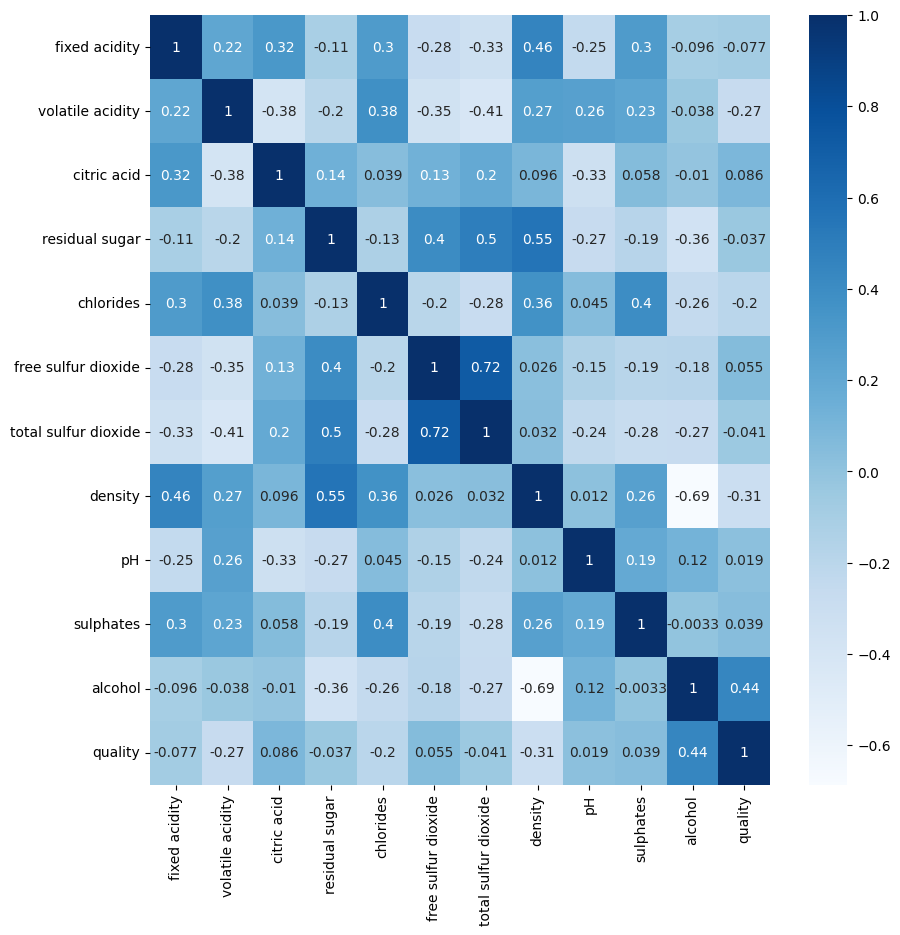

In [55]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, cmap="Blues", annot = True)

Видим, что на качество больше всего влияют такие признаки, как:\
- alcohol
- density
- Voliatile oxidity
- chlorides


###2.3.3 Классы качества вин

In [56]:
from pandas.core.indexes.interval import unique
sorted(df['quality'].unique())

[3, 4, 5, 6, 7, 8, 9]

Видим, что класы вин по качеству от 3 до 9

Теперь посмотрим, как они распределены:

In [57]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

классы совсем не сбалансированы - вин среднего качества больше всего, в то время как высокого или низкого - мало

#3. Data preparation

##3.1 Преобразование категориальных признаков

In [58]:
df = pd.get_dummies(df,drop_first=True)

In [59]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


Заменили столбец с типом вина (белое/красное) на:\
1 - белое\
0 - красное

##3.2 Заполним пропуски

In [60]:
df.isnull().sum()

fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
type_white               0
dtype: int64

Заполним все пропущенные данные средними значениями

In [61]:
df['fixed acidity'] = df['fixed acidity'].fillna(df['fixed acidity'].mean())
df['volatile acidity'] = df['volatile acidity'].fillna(df['volatile acidity'].mean())
df['citric acid'] = df['citric acid'].fillna(df['citric acid'].mean())
df['residual sugar'] = df['residual sugar'].fillna(df['residual sugar'].mean())
df['chlorides'] = df['chlorides'].fillna(df['chlorides'].mean())
df['pH'] = df['pH'].fillna(df['pH'].mean())
df['sulphates'] = df['sulphates'].fillna(df['sulphates'].mean())

In [62]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type_white              0
dtype: int64

##3.3 Посмотрим на наличие выбросов


fixed acidity              Axes(0.125,0.747241;0.133621x0.132759)
volatile acidity        Axes(0.285345,0.747241;0.133621x0.132759)
citric acid              Axes(0.44569,0.747241;0.133621x0.132759)
residual sugar          Axes(0.606034,0.747241;0.133621x0.132759)
chlorides               Axes(0.766379,0.747241;0.133621x0.132759)
free sulfur dioxide        Axes(0.125,0.587931;0.133621x0.132759)
total sulfur dioxide    Axes(0.285345,0.587931;0.133621x0.132759)
density                  Axes(0.44569,0.587931;0.133621x0.132759)
pH                      Axes(0.606034,0.587931;0.133621x0.132759)
sulphates               Axes(0.766379,0.587931;0.133621x0.132759)
alcohol                    Axes(0.125,0.428621;0.133621x0.132759)
quality                 Axes(0.285345,0.428621;0.133621x0.132759)
type_white               Axes(0.44569,0.428621;0.133621x0.132759)
dtype: object

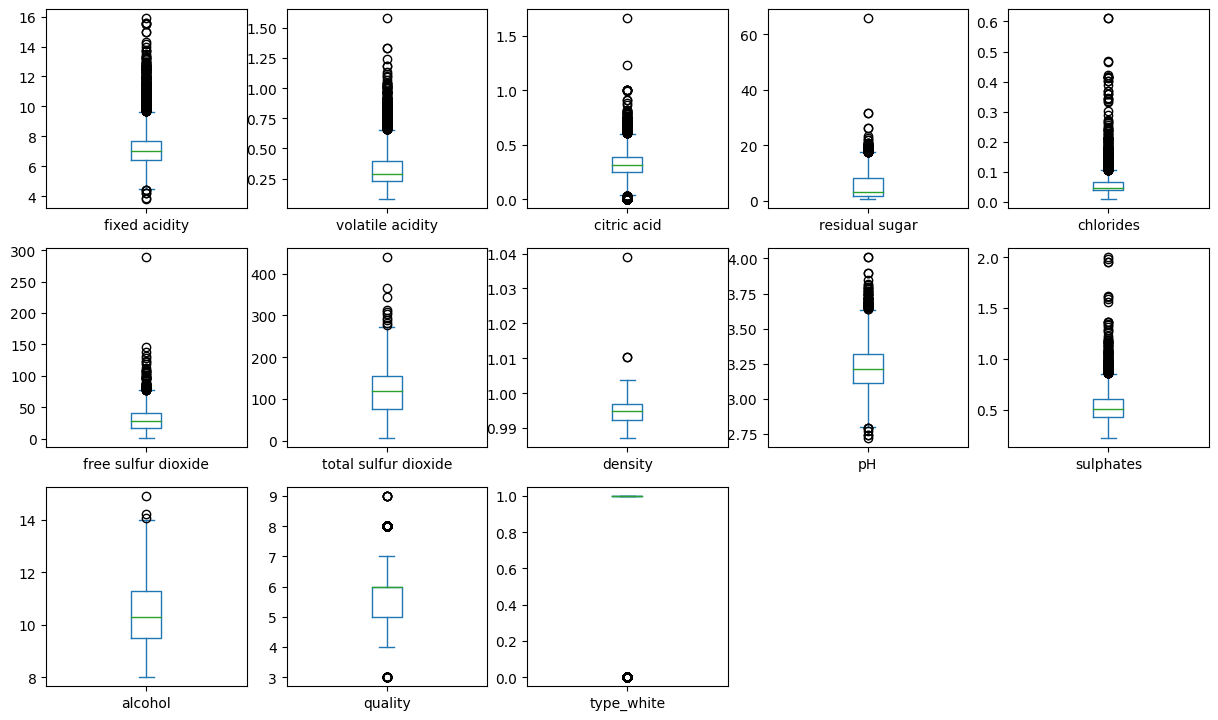

In [63]:
df.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))


Так как представителей некоторых классов и так слишком мало, не будем сильно резать данные, попробуем только удалить самые очевидные выбросы.

In [64]:
df = df.loc[df['citric acid'] <= 1]
df = df.loc[df['volatile acidity'] <= 1.25]
df = df.loc[df['residual sugar'] <= 25]
df = df.loc[df['chlorides'] <= 0.45]
df = df.loc[df['free sulfur dioxide'] <= 130]
df = df.loc[df['total sulfur dioxide'] <= 320]
df = df.loc[df['density'] <= 1.01]
df = df.loc[df['pH'] <= 3.9]
df = df.loc[df['sulphates'] <= 1.5]
df = df.loc[df['alcohol'] <= 14]

Проверим на всякий случай, что не потеряли совсем какие-то классы

In [73]:
df['quality'].value_counts()

6    2824
5    2126
7    1077
4     214
8     193
3      26
9       5
Name: quality, dtype: int64

#4. Моделирование
##4.1 Выбор модели

In [92]:
model1 = KNeighborsClassifier(n_neighbors=5)
model2 = SVC()
model3 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4 = RandomForestClassifier()

## 4.2 Разделение данных на train и test

In [93]:
x = df.drop(['quality'], axis =1)
y = df['quality']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

##4.3 Обучение моделей

In [94]:
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)
model3.fit(x_train, y_train)
model4.fit(x_train, y_train)

RandomForestClassifier()

In [95]:
y_pred1 = model1.predict(x_test)
y_pred2 = model2.predict(x_test)
y_pred3 = model3.predict(x_test)
y_pred4 = model4.predict(x_test)

#5. Оценка качества моделей

In [96]:
print("Accuracy Score of KNeighbours:",accuracy_score(y_test,y_pred1))
print("Accuracy Score of SVC:",accuracy_score(y_test,y_pred2))
print("Accuracy Score of Decission tree:",accuracy_score(y_test,y_pred3))
print("Accuracy Score of Random Forest:",accuracy_score(y_test,y_pred4))

Accuracy Score of KNeighbours: 0.4748646558391338
Accuracy Score of SVC: 0.43155452436194897
Accuracy Score of Decission tree: 0.6009280742459396
Accuracy Score of Random Forest: 0.6883217324052591


Как видим, лучшие показатели показывает случайный лес, но качество пока плохое, так что разворачивать модель не будем. Предположительно, для того чтобы сбалансировать классы, нужно создать новый признак и делить вино не по классам, а бинарно - на плохое или хорошее.

#6. Сохранение данных для дальнейшего использования

In [102]:
df.to_csv('processed_df.csv', index=False)

In [101]:
import pickle
pickle.dump(model4, open('RandomForest.sav', 'wb'))

In [103]:
pickle.dump(model1, open('KNeighbours.sav', 'wb'))
pickle.dump(model2, open('SVC.sav', 'wb'))
pickle.dump(model3, open('Decision tree.sav', 'wb'))